<a href="https://colab.research.google.com/github/HuaiyuZhang/misc/blob/main/%5Bfin%5Dhourly_view.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# download data
ticker = "UBER"
now = datetime.now()
start_date = now - timedelta(days=60)
end_date = now - timedelta(days=30)
data = yf.download(ticker, start=start_date, end=end_date, interval="30m")

# get only weekdays
data = data[data.index.to_series().apply(lambda x: x.weekday() < 5)]

# reset the index
data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [39]:
# create a new date column that only includes the date (not the time)
# data['Date'] = data['Datetime'].dt.date
data['hour'] = data['Datetime'].dt.hour
data['30m'] = data['Datetime'].dt.minute
# set the time as the index
data.set_index('Datetime', inplace=True)

In [44]:
# group by the new date column and find the mean price per day
daily_prices = data.groupby(['hour','30m']).median().reset_index()

In [45]:
daily_prices['label'] = daily_prices['hour'].astype(str) + ':' + daily_prices['30m'].astype(str)

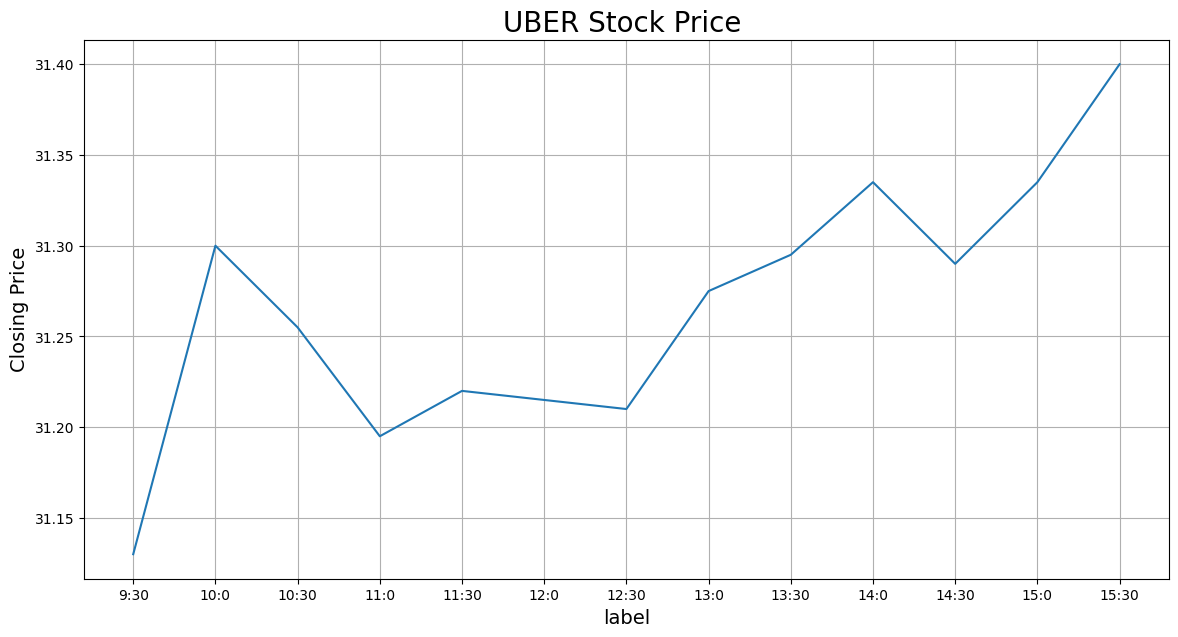

In [46]:
# plot data
plt.figure(figsize=(14,7))
plt.plot(daily_prices['label'], daily_prices['Close'])
plt.xlabel('label', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.title('UBER Stock Price ', fontsize=20)
plt.grid()
plt.show()